In [1318]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

Прямая задача

In [1319]:
def generate_3d_coord(range = 20):
    return np.random.rand(3) * range

In [1320]:
def generate_2d_coord(range = 20):
    return np.random.rand(2) * range

In [1321]:
a1 = generate_3d_coord()
print(a1)
a2 = generate_3d_coord()
print(a2)
a3 = generate_3d_coord()
print(a3)

[14.37396862 12.01525894  4.74915865]
[ 4.40335626 16.83966132  6.17278145]
[14.91161646 11.9842464   7.37592271]


In [1322]:
def solve_plane_eq(a1, a2, a3):
    a = np.array([a1, a2, a3])
    b = [-1, -1, -1]
    x = np.linalg.solve(a, b)
    return x

In [1323]:
def get_plane_point(plane_coefs):
    point = generate_2d_coord()
    point_z = (-1 - plane_coefs[1] * point[1] - plane_coefs[0] * point[0]) / plane_coefs[2]
    point = np.append(point, [point_z])
    return point

In [1324]:
plane_coefs = solve_plane_eq(a1, a2, a3)
print(plane_coefs)

[-0.02564779 -0.05436607  0.00460774]


In [1325]:
a4 = get_plane_point(plane_coefs)
print(a4)

[ 4.03645795 18.68605387 25.91586126]


In [1326]:
a5 = generate_3d_coord()
print(a5)

[ 7.17148117 14.82874183  0.57001332]


In [1327]:
plane_coefs2 = solve_plane_eq(a1, a3, a5)
print(plane_coefs2)
a6 = get_plane_point(plane_coefs2)
print(a6)

[-0.02431882 -0.05584152  0.00431831]
[ 2.44450621 17.83584082 12.83559066]


In [1328]:
plane_coefs3 = solve_plane_eq(a1, a2, a5)
print(plane_coefs3)
a7 = get_plane_point(plane_coefs3)
print(a7)

[-0.02572513 -0.05526938  0.00712717]
[16.449898   19.28914381 68.64920887]


In [1329]:
a8 = solve_plane_eq(plane_coefs, plane_coefs2, plane_coefs3)
print(a8)

[14.37396862 12.01525894  4.74915865]


In [1330]:
a1 = [0.9, 0, 1]
a2 = [1.9, 0, 1]
a3 = [0.9, 1, 1]
a4 = [1.9, 1, 1]
a5 = [0, 0, 0]
a6 = [0, 0.5, 0]
a7 = [0.5, 0, 0]
a8 = [0.5, 0.5, 0]


In [1331]:
X = [a1[0], a2[0], a3[0], a4[0], a5[0], a6[0], a7[0], a8[0]]
Y = [a1[1], a2[1], a3[1], a4[1], a5[1], a6[1], a7[1], a8[1]]
Z = [a1[2], a2[2], a3[2], a4[2], a5[2], a6[2], a7[2], a8[2]]

In [1332]:
def plot_3d(X, Y, Z, times = 1):
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.scatter3D(X, Y, Z)
    for i in range(times):
        v = i * 8
        ax.plot([X[v + 0], X[v + 1]], [Y[v + 0],Y[v + 1]],zs=[Z[v + 0],Z[v + 1]])
        ax.plot([X[v + 0], X[v + 2]], [Y[v + 0],Y[v + 2]],zs=[Z[v + 0],Z[v + 2]])
        ax.plot([X[v + 3], X[v + 2]], [Y[v + 3],Y[v + 2]],zs=[Z[v + 3],Z[v + 2]])
        ax.plot([X[v + 3], X[v + 1]], [Y[v + 3],Y[v + 1]],zs=[Z[v + 3],Z[v + 1]])

        ax.plot([X[v + 0], X[v + 4]], [Y[v + 0],Y[v + 4]],zs=[Z[v + 0],Z[v + 4]])
        ax.plot([X[v + 5], X[v + 4]], [Y[v + 5],Y[v + 4]],zs=[Z[v + 5],Z[v + 4]])
        ax.plot([X[v + 5], X[v + 2]], [Y[v + 5],Y[v + 2]],zs=[Z[v + 5],Z[v + 2]])

        ax.plot([X[v + 6], X[v + 4]], [Y[v + 6],Y[v + 4]],zs=[Z[v + 6],Z[v + 4]])
        ax.plot([X[v + 6], X[v + 1]], [Y[v + 6],Y[v + 1]],zs=[Z[v + 6],Z[v + 1]])

        ax.plot([X[v + 6], X[v + 7]], [Y[v + 6],Y[v + 7]],zs=[Z[v + 6],Z[v + 7]])
        ax.plot([X[v + 3], X[v + 7]], [Y[v + 3],Y[v + 7]],zs=[Z[v + 3],Z[v + 7]])
        ax.plot([X[v + 5], X[v + 7]], [Y[v + 5],Y[v + 7]],zs=[Z[v + 5],Z[v + 7]])

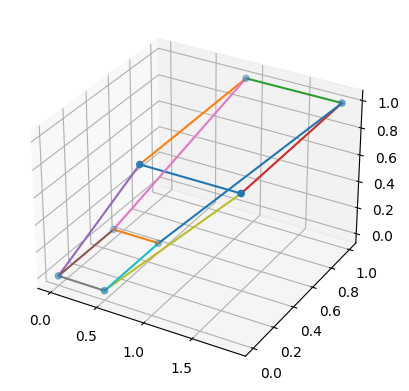

In [1333]:
plot_3d(X, Y, Z)

In [1334]:
V = generate_3d_coord(3)
print(V)

V = [2.33807083, 2.52382013, 2.96882315]

[0.51324906 1.0274247  0.04628021]


In [1335]:
def move_points(X, Y, Z, move_vector):
    X_new = []
    Y_new = []
    Z_new = []
    for i in range(8):
        X_new.append(X[i] + move_vector[0])
        Y_new.append(Y[i] + move_vector[1])
        Z_new.append(Z[i] + move_vector[2])
    return X_new, Y_new, Z_new

In [1336]:
X2, Y2, Z2 = move_points(X, Y, Z, V)
x = np.append(X, X2)
y = np.append(Y, Y2)
z = np.append(Z, Z2)
frames = 5
for i in range(frames - 2):
    X2, Y2, Z2 = move_points(X2, Y2, Z2, V)
    x = np.append(x, X2)
    y = np.append(y, Y2)
    z = np.append(z, Z2)

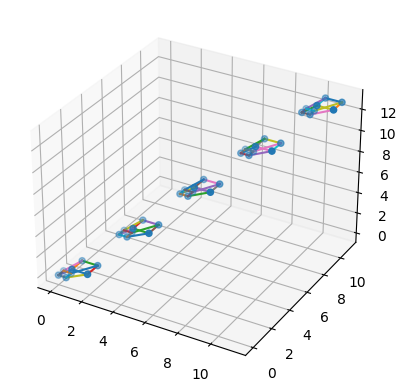

In [1337]:
plot_3d(x, y, z, 5)

In [1338]:
# camera = [0, 0, 0]
# o_x = 45
# o_y = 45
# o_z = 45
# matrix_1 = np.array([[1, 0, 0],[0, np.cos(o_x), np.sin(o_x)], [0, -np.sin(o_x), np.cos(o_x)]])

# matrix_2 = np.array([[np.cos(o_y), 0, -np.sin(o_y)],[0, 1, 0], [np.sin(o_y), 0, np.cos(o_y)]])

# matrix_3 = np.array([[np.cos(o_z), np.sin(o_z), 0], [-np.sin(o_z), np.cos(o_z), 0], [0, 0, 1]])

# P = np.matmul(np.matmul(matrix_1, matrix_2), matrix_3)


In [1339]:
# X_2d = []
# Y_2d = []
# f = 1
# for i in range(8 * 4):
#     tmp = np.array([x[i], y[i], z[i]])
#     proj = np.matmul(P, tmp)
#     # print(proj)
#     X_2d.append(f / (proj[2] + 1e-10) * proj[0])
#     Y_2d.append(f / (proj[2] + 1e-10) * proj[2])
#     # X_2d.append((x[i] * np.cos(a)) + (z[i] * np.sin(a)))
#     # Y_2d.append((x[i] * np.sin(a) * np.cos(b)) + (y[i] * np.cos(b)) - (z[i] * np.cos(a) * np.sin(b)))

In [1340]:
# plt.scatter(X_2d, Y_2d, c ="blue")
# plt.show()

In [1341]:

X_2d = []
Y_2d = []
distance_to_camera = 3
a = 45
b = 45

for j in range(5):
    min_ = 500
    min_i = -1
    for i in range(8):
        z_2d = (-x[8 * j +i] * np.sin(a) * np.cos(b)) + (y[8 * j +i] * np.sin(b)) + (z[8 * j +i] * np.cos(a) * np.cos(b))
        
        if (z_2d < min_):
            min_ = z_2d
            min_i = i

    print(min_)
    print(min_i)   

    for i in range(8):
        if i == 6:
            continue

        # if i == 7:
        #     continue
        X_2d.append((x[8 * j +i] * np.cos(a)) + (z[8 * j +i] * np.sin(a)))
        Y_2d.append((x[8 * j +i] * np.sin(a) * np.cos(b)) + (y[8 * j +i] * np.cos(b)) - (z[8 * j +i] * np.cos(a) * np.sin(b)))

    
        # X_2d.append(x[i] / (z[i] + 1e-15) * distance_to_camera)
        # Y_2d.append(y[i] / (z[i] + 1e-15) * distance_to_camera)

-0.5733336384851151
1
1.3483659575469018
1
3.2700655535789185
1
5.1917651496109345
1
7.113464745642952
1


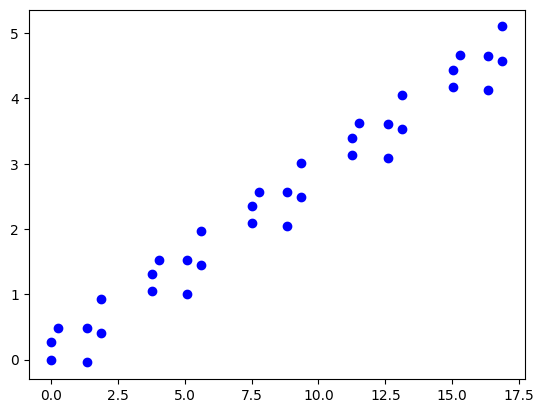

In [1342]:
plt.scatter(X_2d, Y_2d, c ="blue")
plt.show()

Обратная Задача

In [1343]:
print(X_2d)
print(Y_2d)

[1.3236933144700753, 1.8490153032878047, 1.3236933144700753, 1.8490153032878047, 0.0, 0.0, 0.26266099440886487, 5.078115414935879, 5.603437403753608, 5.078115414935879, 5.603437403753608, 3.754422100465804, 3.754422100465804, 4.0170830948746685, 8.832537515401683, 9.357859504219412, 8.832537515401683, 9.357859504219412, 7.508844200931608, 7.508844200931608, 7.771505195340473, 12.586959615867485, 13.112281604685215, 12.586959615867485, 13.112281604685215, 11.263266301397412, 11.263266301397412, 11.525927295806277, 16.341381716333288, 16.866703705151018, 16.341381716333288, 16.866703705151018, 15.017688401863216, 15.017688401863216, 15.280349396272081]
[-0.04469983318002785, 0.4022984986202511, 0.4806221556377019, 0.9276204874379808, 0.0, 0.26266099440886487, 0.48616016030900433, 0.9991731421106373, 1.446171473910916, 1.5244951309283672, 1.9714934627286458, 1.0438729752906657, 1.3065339696995306, 1.53003313559967, 2.0430461174013024, 2.490044449201582, 2.568368106219032, 3.01536643801931

In [1344]:
def write_data(filename, data):
    with open(filename, 'w') as filehandle:
        for listitem in data:
            filehandle.write(f'{listitem}\n')

In [1345]:
buffer_x = []
for j in range(5):
    for i in range(7):
        if (i == 0 or i == 2 or i == 4):
            buffer_x.append(X_2d[7 * j + i])

buffer_y = []
for j in range(5):
    for i in range(7):
        if (i == 0 or i == 2 or i == 4):
            buffer_y.append(Y_2d[7 * j + i])
        

write_data("x_2d.txt", buffer_x)
write_data("y_2d.txt", buffer_y)

In [1346]:
a = [0.6262501853, 2.20409694, -0.01781453779, -0.82305973, -0.1971083312, 0.4522167128, 0.1374719509, -1.167877358, 0.6098965548, -0.5449151622, 0.02044219132, 0.7139989007, 1.161697023, 1.41373354, 3.025862027, 1.767662908, 0.5197750716, 4.138661657, 1.64881933, 0.5990878468, 9.796104803, 1.20920436, 0.1096412438, 9.868487424 ] 


# a1 = [0, 0, 1]
# a2 = [1, 0, 1]
# a3 = [0, 1, 1]
# a4 = [1, 1, 1]
# a5 = [0, 0, 0]
# a6 = [0, 1, 0]
# a7 = [1, 0, 0]
# a8 = [1, 1, 0]

In [1347]:
a = [-1.809273986, 3.379640918, 0.0831460498, -0.0447300912, -0.694216939, 0.6211864972, 0.2216871386, 0.1013339543, 0.5996607104, -0.564009757, 0.05904143416, 0.7803884312, 1.051917669, 1.472104013, 3.377660307, 1.054866222, 0.9275185835, 0.0639858924, 0.8125619972, 0.8219680231, 1.822062602, 0.3741751907, 0.2105786361, 0.1237524973 ]


# a1 = [0.9, 0, 1]
# a2 = [1.9, 0, 1]
# a3 = [0.9, 1, 1]
# a4 = [1.9, 1, 1]
# a5 = [0, 0, 0]
# a6 = [0, 0.5, 0]
# a7 = [0.5, 0, 0]
# a8 = [0.5, 0.5, 0]

In [1348]:
# a = [-1.809273986, 3.379640918, 0.0831460498, -0.0447300912, -0.694216939, 0.6211864972, 0.2216871386, 0.1013339543, 0.5996607104, -0.564009757, 0.05904143416, 0.7803884312, 1.051917669, 1.472104013, 3.377660307, 1.054866222, 0.9275185835, 0.0639858924, 0.8125619972, 0.8219680231, 1.822062602, 0.3741751907, 0.2105786361, 0.1237524973 ]


# a1 = [0.9, 0, 1]
# a2 = [1.9, 0, 1]
# a3 = [0.9, 1, 1]
# a4 = [1.9, 1, 1]
# a5 = [0, 0, 0]
# a6 = [0, 0.5, 0]
# a7 = [0.5, 0, -1]
# a8 = [0.5, 0.5, -1]

In [1349]:
P = np.array([[a[0], a[1], a[2], a[3]], [a[4], a[5], a[6], a[7]], [a[8], a[9], a[10], a[11]]])
V = np.array([a[12], a[13], a[14]])

print(V)

X_a = np.array([a[15], a[16], a[17]])
X_e = np.array([a[18], a[19], a[20]])
X_j = np.array([a[21], a[22], a[23]])

[1.05191767 1.47210401 3.37766031]


In [1350]:
def solve_coord_eq(a1, a2, a3, b1, b2, b3):
    a = np.array([a1, a2, a3])
    b = [b1, b2, b3]
    x = np.linalg.solve(a, b)
    return x

In [1351]:
res_x = []
res_y = []
res_z = []
for i in range(7):
    x1 = X_2d[i]
    y1 = Y_2d[i]
    x2 = X_2d[i + 7]

    a1 = [x1*P[2][0] - P[0][0], x1*P[2][1] - P[0][1], x1*P[2][2] - P[0][2]]
    b1 = P[0][3] - x1*P[2][2]

    a2 = [y1*P[2][0] - P[1][0], y1*P[2][1] - P[1][1], y1*P[2][2] - P[1][2]]
    b2 = P[1][3] - y1*P[2][2]

    a3 = [x2*P[2][0] - P[0][0], x2*P[2][1] - P[0][1], x2*P[2][2] - P[0][2]]
    b3 = P[0][3] - x2*P[2][2] - V[0] * (x2*P[2][0] - P[0][0]) - V[1] * (x2*P[2][1] - P[0][1]) - V[2] * (x2*P[2][2] - P[0][2])

    cord = solve_coord_eq(a1, a2, a3, b1, b2, b3)

    # if i == 0 or i == 4 or i == 1:
    #     continue
    res_x.append(cord[0] - V[0])
    res_y.append(cord[1] - V[1])
    res_z.append(cord[2] - V[2])
    

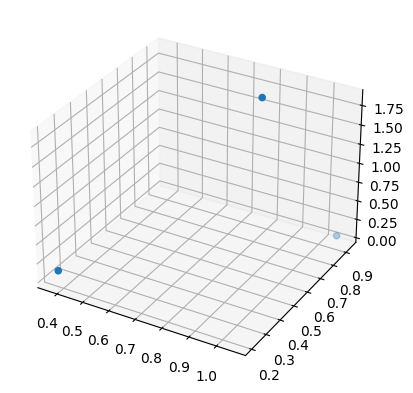

In [1352]:
res_xx = [X_a[0], X_e[0], X_j[0]]
res_yy = [X_a[1], X_e[1], X_j[1]]
res_zz = [X_a[2], X_e[2], X_j[2]]

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(res_xx, res_yy, res_zz, colors)

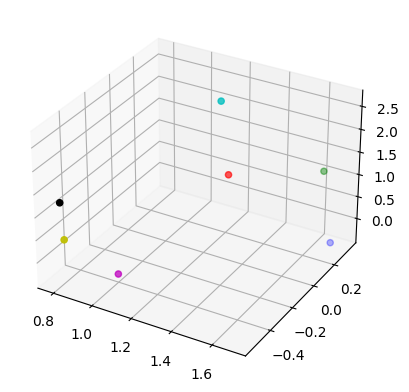

In [1353]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(res_x, res_y, res_z, c = colors)

In [1354]:
def plot_3d_rec(X, Y, Z, times = 1):
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.scatter3D(X, Y, Z)
    for i in range(times):
        v = i * 7
        ax.plot([X[v + 0], X[v + 1]], [Y[v + 0],Y[v + 1]],zs=[Z[v + 0],Z[v + 1]])
        ax.plot([X[v + 0], X[v + 2]], [Y[v + 0],Y[v + 2]],zs=[Z[v + 0],Z[v + 2]])
        ax.plot([X[v + 3], X[v + 2]], [Y[v + 3],Y[v + 2]],zs=[Z[v + 3],Z[v + 2]])
        ax.plot([X[v + 3], X[v + 1]], [Y[v + 3],Y[v + 1]],zs=[Z[v + 3],Z[v + 1]])

        ax.plot([X[v + 0], X[v + 4]], [Y[v + 0],Y[v + 4]],zs=[Z[v + 0],Z[v + 4]])
        ax.plot([X[v + 5], X[v + 4]], [Y[v + 5],Y[v + 4]],zs=[Z[v + 5],Z[v + 4]])
        ax.plot([X[v + 5], X[v + 2]], [Y[v + 5],Y[v + 2]],zs=[Z[v + 5],Z[v + 2]])

        # ax.plot([X[v + 6], X[v + 4]], [Y[v + 6],Y[v + 4]],zs=[Z[v + 6],Z[v + 4]])
        # ax.plot([X[v + 6], X[v + 1]], [Y[v + 6],Y[v + 1]],zs=[Z[v + 6],Z[v + 1]])

        # ax.plot([X[v + 6], X[v + 7]], [Y[v + 6],Y[v + 7]],zs=[Z[v + 6],Z[v + 7]])
        ax.plot([X[v + 3], X[v + 6]], [Y[v + 3],Y[v + 6]],zs=[Z[v + 3],Z[v + 6]])
        ax.plot([X[v + 5], X[v + 6]], [Y[v + 5],Y[v + 6]],zs=[Z[v + 5],Z[v + 6]])

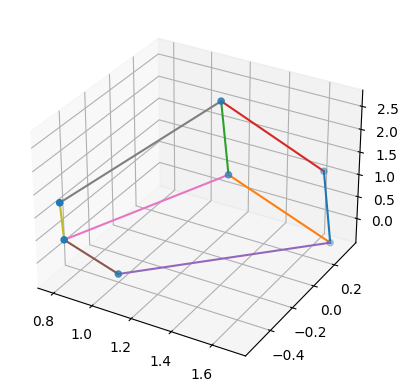

In [1355]:
plot_3d_rec(res_x, res_y, res_z)

In [1356]:
plane1 = solve_plane_eq([res_x[4], res_y[4], res_z[4]], [res_x[5], res_y[5], res_z[5]], [res_x[6], res_y[6], res_z[6]], )

plane2 = solve_plane_eq([res_x[0], res_y[0], res_z[0]], [res_x[1], res_y[1], res_z[1]], [res_x[4], res_y[4], res_z[4]])

plane3 = solve_plane_eq([res_x[6], res_y[6], res_z[6]], [res_x[3], res_y[3], res_z[3]], [res_x[1], res_y[1], res_z[1]])

In [1357]:
def solve_plane_eq1(a1, a2, a3):
    a = np.array([a1, a2, a3])
    b = [-2/3, -2/3, -2/3]
    x = np.linalg.solve(a, b)
    return x

In [1358]:
a8 = solve_plane_eq1(plane1, plane2, plane3)
print(a8)

tmp = [res_x[6], res_y[6], res_z[6]]
res_x[6] = a8[0]
res_y[6] = a8[1]
res_z[6] = a8[2]
res_x.append(tmp[0])
res_y.append(tmp[1])
res_z.append(tmp[2])

[ 0.83339401 -0.14865895 -0.46603731]


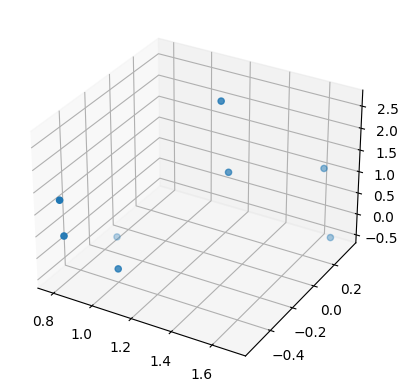

In [1359]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(res_x, res_y, res_z)

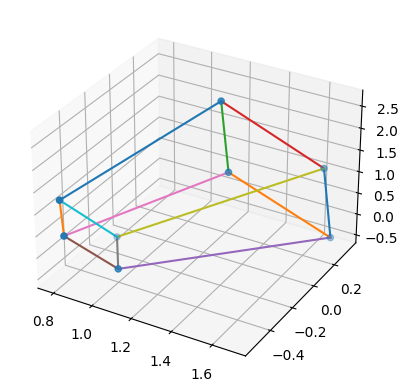

In [1360]:
plot_3d(res_x, res_y, res_z)